# Tir balistique avec frottements
Le but est de déterminer la portée d'un tir dans un champ de pesanteur ($g=9.81 m/s^2$) en tenant compte des frottements. On testera deux types de frottements (cas d'un ballon de football) :
* des frottements fluides linéaires (coefficient $l = 3.5 \times 10^{-5} kg.s^{-1}$)
* des frottements fluides quadratiques (coefficient $k = 8.3 \times 10^{-3} kg.m^{-1}$)

Le mobile est tiré depuis le point $O(0, 0)$ avec une vitesse $v_0$ selon un angle $\alpha$.

La mise en équation donne donc :

* cas linéaire :

$${\rm{d} \over \rm{d}t}
\begin{pmatrix}
x\\
z\\
\dot x\\
\dot z
\end{pmatrix}
=
\begin{pmatrix}
\dot x\\
\dot z\\
- \frac{l}{m} \dot x\\
- \frac{l}{m} \dot z - g
\end{pmatrix}
$$

* cas quadratique :

$${\rm{d} \over \rm{d}t}
\begin{pmatrix}
x\\
z\\
\dot x\\
\dot z
\end{pmatrix}
=
\begin{pmatrix}
\dot x\\
\dot z\\
- \frac{k}{m} \dot x \sqrt{\dot x^2 + \dot z^2}\\
- \frac{k}{m} \dot z \sqrt{\dot x^2 + \dot z^2}\\ - g
\end{pmatrix}
$$

avec 

$$
\begin{pmatrix}
x\\
z\\
\dot x\\
\dot z
\end{pmatrix}
(t=0) =
\begin{pmatrix}
0\\
0\\
v_0 \cos \alpha\\
v_0 \sin \alpha
\end{pmatrix}
$$

On implémentera la vision vectorielle du schéma d'Euler explicite :

$$
Y_{k+1} = Y_k + F(Y_k, t_k) \times pas
$$

avec :

$$
Y_k =
\begin{pmatrix}
x_k\\
z_k\\
\dot x_k\\
\dot z_k
\end{pmatrix}
$$

> __Exercice :__  
> 1. Ecrire les fonctions `Flin` et `Fquad` associée au schéma d'Euler explicite puis la fonction `euler(F, Y0, tf, pas)` qui réalise l'intégration de $t=0$ à $t=tf$ avec un `pas` d'intégration.
> 2. Utiliser la fonction précédente pour obtenir la trajectoire pour un angle $\alpha = \pi / 4$ et une vitesse initiale $v_0 = 10 m/s$. Les représenter et lire graphiquement la portée dans les deux cas.
> 3. Ecrire une fonction `portee(F, Y0)` qui déterminer la portée du tir pour une fonction `F` (distance suivant x parcouru quand le mobile revient àl l'altitude $z=0$). Tracer alors pour des frottements linéaires, puis pour des frottements quadratiques la portée en fonction de l'angle pour une vitesse $v_0$ donnée. Quel angle (par elcture graphique) permet une portée maximale ? Retrouver cette valeur en utilisant les fonctions de Python.

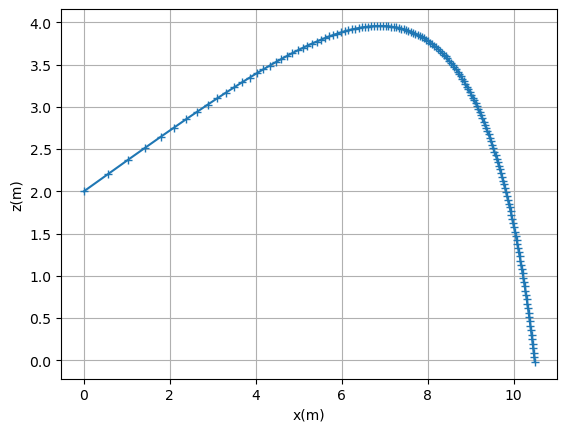

In [11]:
from numpy import *
from matplotlib.pyplot import *

"""
Les bibliothèques scientifiques ne sont pas importées
car elles ont été importées pour l'exercice précédent.
"""

def f_bad(t, Y):  # Y est un vecteur de taille 2
    g = 9.81
    Cx = 0.65
    rho = 1.29
    R = 3.4e-2
    m = 5.3e-3
    coef = -1/(2 * m) * rho * Cx * pi * R ** 2
    v = sqrt(Y[2] ** 2 + Y[3]**2)
    return np.array([Y[2], Y[3], coef * v * Y[2], -g + coef * v * Y[3]])

def euler(f, v0, alpha, pas):
    h0 = 2  # Hauteur de départ
    Y0 = array([0, h0, v0 * cos(alpha), v0 * sin(alpha)])  # Vecteur numpy pour faciliter les opérations mathématiques
    tk = [0]
    yk = [Y0]
    while yk[-1][1]>=0:
        yk.append(yk[-1] + pas * f(tk[-1], yk[-1]))
        tk.append(tk[-1] + pas)
    return array(yk)


V0 = 60
alpha0 = 20 / 180 * pi  # Passage en radians
pas = 1e-2
yk = euler(f_bad, V0, alpha0, pas)
plot(yk[:, 0], yk[:,1], marker='+')
xlabel('x(m)')
ylabel('z(m)')
grid()

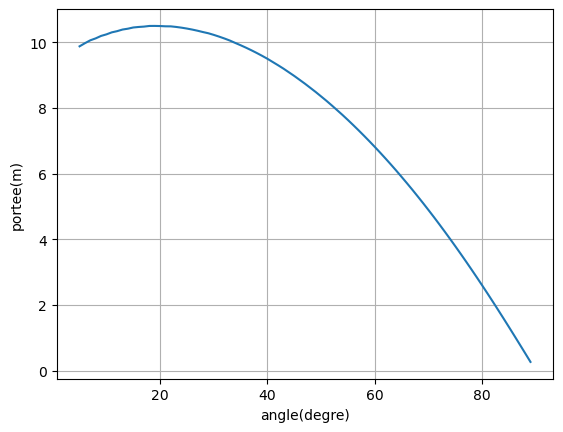

In [23]:
def portee(alph):
    V0 = 60
    pas = 1e-2
    yk = euler(f_bad, V0, alph, pas)
    return yk[-1, 0]  # La portée est la dernière valeur de x.

alphs = np.arange(5, 90, 1)  # Angle en degrés de 5 à 85 degrés
alphrs = alphs /180 * pi  # Passage en radians

portees = []
for alph in alphrs:
    portees.append(portee(alph))

plot(alphs, portees)
xlabel('angle(degre)')
ylabel('portee(m)')
grid()

In [24]:
"""On va réaliser une dichotomie
mais basée sur les indices des angles"""
imin = 0
imax = len(portees) - 1

while (imax-imin) > 1: # On se ramène à deux indices possibles
    imid = int((imax+imin) / 2)  # On prend l'indice médian, c'est un entier
    if portees[imid] == 9:
        imax = imid
        imin = imid
    elif portees[imid] > 9: # La portée voulu est dans la partie droite
        imin = imid
    else:
        imax = imid

print(alphs[imax], portees[imax])
print(alphs[imin], portees[imin])

45 8.974193450851331
44 9.085022020967035
